In [ ]:
# Plot 

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')

from time import sleep
from IPython.display import clear_output, display
import pandas as pd 
import string
# # sys.path.append(pathPostProcessing+'/2_CosmicIntegration')

In [3]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
# import ClassEvents            as CE
# import ClassBayes             as CB
import coencodeVarious        as CV
from PostProcessingScripts import * 


In [4]:
print(MSSFRnameslist)
DCOTypeList = ['BHBH', 'BHNS', 'NSNS']

NumberBPSmodels=12
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']


In [62]:
path = '/Users/floorbroekgaarden/Projects/BHNS_project/otherCode/PostProcessingPlus/'
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
#specific path to use now
path1 = path+'BNS_model_A.h5'
fdata = h5.File(path1)
print(fdata.keys())


print(fdata['weights_detectedPerRedshift'].keys())
print(len(fdata['weights_intrinsic']['w_000'][...].squeeze()))



ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
xvar = np.log10(ZZ)

[]


KeyError: "Unable to open object (object 'weights_detectedPerRedshift' doesn't exist)"

In [ ]:
f = 

In [ ]:
keys = ['a', 'b', 'c']
>>> values = [1, 2, 3]
>>> dictionary = dict(zip(keys, values))

In [61]:
path = '/Volumes/Andromeda/DATA/AllDCO/fiducial/COMPASCompactOutput_BHNS_G.h5'


fdata = h5.File(path)
print(fdata.keys())
print(len(fdata['weights_detected']['SEED'][...]))
print(len(fdata['weights_detected']['w_212'][...]))
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = np.log10(ZZ)

print(len(fdata['doubleCompactObjects']['M1'][...].squeeze()))

[]


KeyError: "Unable to open object (object 'weights_detected' doesn't exist)"

In [60]:
fdata.close()

In [66]:
path = '/Volumes/Andromeda/DATA/AllDCO/fiducial/COMPASCompactOutput_BHNS_Atemp.h5'


fdata = h5.File(path)
print(fdata.keys())
print(len(fdata['weights_detected']['SEED'][...]))
print(len(fdata['weights_detected']['w_212'][...]))


print(len(fdata['doubleCompactObjects']['M1'][...].squeeze()))


ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()

print(ZZ)
xvar = np.log10(ZZ)

print(np.unique(xvar))

fdata.close()

[u'doubleCompactObjects', u'supernovae', u'systems', u'weights_detected', u'weights_detectedPerRedshift', u'weights_intrinsic', u'weights_intrinsicPerRedshift']
943254
943254
943254
[0.0001 0.0001 0.0001 ... 0.022  0.022  0.022 ]
[-4.         -3.95860731 -3.92081875 -3.85387196 -3.79588002 -3.76955108
 -3.7212464  -3.65757732 -3.61978876 -3.56863624 -3.52287875 -3.46852108
 -3.43179828 -3.37675071 -3.32790214 -3.28399666 -3.23657201 -3.18708664
 -3.13667714 -3.09151498 -3.04575749 -2.99567863 -2.94692156 -2.89962945
 -2.85387196 -2.80410035 -2.75696195 -2.70996539 -2.66154351 -2.61439373
 -2.5654311  -2.51855737 -2.4698003  -2.4225082  -2.37468755 -2.32697909
 -2.27901426 -2.2313619  -2.1837587  -2.13548892 -2.08777794 -2.04000516
 -1.99225222 -1.94423954 -1.89653838 -1.84893675 -1.80106813 -1.75325529
 -1.70531338 -1.65757732]


In [41]:
fdata.close()

In [86]:
def makeDistributionPlotManyModels(axe=None, xparamGroup='doubleCompactObjects', xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
                              xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']):
    
    
    """ 
    plot total mass distribution with channels 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    indplot = something I use to hack the legend labels (I only want to plot the legends for some subplots)
    whichWeight = 'intrinsic' 'observed'
    you can just put indplot=0 or indplot=1 to get labels or no labels resp. 
    """
    
    # constants
    Zsolar=0.0142
    nModels = 12
    BPScolors       = sns.color_palette("husl", nModels)
    lw = 3.5
    Virgo         = '/Volumes/Virgo/DATA/BHNS/'
    VirgoAllDCO = '/Volumes/Virgo/DATA/AllDCO/'
    AndromedaBHNS = '/Volumes/Andromeda/DATA/BHNS/'
    AndromedaAllDCO  = '/Volumes/Andromeda/DATA/AllDCO/'

    NumberBPSmodels=12
    alphabet = list(string.ascii_uppercase)
    BPSnameslist = alphabet[:NumberBPSmodels]

    BPSdir = ['fiducial/', 'fiducial/', 'alpha0_5/', 'alpha2_0/', None, 'rapid/', 'zeroBHkick/', None, None, None, 'ccSNkick_100km_s/', 'ccSNkick_30km_s/']

    dictBPSnameToDir   = dict(zip(BPSnameslist, BPSdir))    
    dictBPSnameToColor = dict(zip(BPSnameslist, BPScolors))
    ymax=0
    
    #####
    for ind_m, BPSmodelName in enumerate(BPSmodelNames):
        print('now at model ', BPSmodelName)
        if BPSmodelName in ['A', 'B', 'C',  'D', 'G', 'K', 'L']:
            path1 = AndromedaAllDCO
            path1 = path1 + dictBPSnameToDir[BPSmodelName]
            path = path1 + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + 'temp.h5'
            if BPSmodelName =='B':
                path = path1 + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
                
#             print(path)
        elif BPSmodelName in ['F']:
            path = VirgoAllDCO
            path = path + dictBPSnameToDir[BPSmodelName]
            path = path + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'        
        else:
            print('error: path does not exist')
#             print('given path:', path)
            
        fdata = h5.File(path)
        
        # obtain parameter that I want to plot
        if xparam in ['MBH', 'MNS', 'q', 'Mchirp', 'Mtot']:
            M1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            M2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            MBH, MNS = obtainM1BHandM2BHassymetric(M1, M2)
            del M1
            del M2
            if xparam=='MBH':
                xvar = MBH
            elif xparam=='MNS':
                xvar=MNS
            elif xparam=='q':
                xvar = MBH/MNS
            elif xparam=='Mchirp':
                xvar = chirpmass(MBH, MNS)
            elif xparam=='Mtot':
                xvar = MNS + MBH
            del MNS
            del MBH
        elif xparam=='logZ':
            print('logZ !!')
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = np.log10((ZZ/Zsolar))
            
            
            
        else:
            xvar = fdata[xparamGroup][xparam][...].squeeze()
            
            
        # get intrinsic weights
        if whichWeight == 'z0':
            fparam = 'weights_intrinsic'
        # get detected weights
        elif whichWeight =='det':
            fparam = 'weights_detected'
 

        ####################################################
        ######### ITERATE  OVER  MSSFR  MODELS #############
        ####################################################
        ii=0
        for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
#             print('mssfr =',ind_mssfr)
            weightheader = 'w_' + mssfr
            w = fdata[fparam][weightheader][...].squeeze()
            
           
        
        
            if BPSmodelName in whichBPScolor:
                if mssfr in ['000', '231', '312']:
                    zorder=20
                    ALPHA=1
                    label = None
                    linestyle = MSSFRlinestyles[ii]
                    ii+=1
                    BPScolor = dictBPSnameToColor[BPSmodelName]
                    # only give label for fiducial MSSFR
                    if mssfr=='000':
                        label = BPSmodelName
                else:
                    zorder=10
                    ALPHA=0.1
                    label = None
                    linestyle = '-'
                    BPScolor = dictBPSnameToColor[BPSmodelName]

                        
            else:
                zorder=1
                ALPHA=0.2
                label=None
                linestyle='-'
                BPScolor='gray'
                
                

            # make the plot 
            if whichPlot=='cdf':
                axe.hist(xvar, density=True, bins=len(xvar), cumulative=True,
                         histtype='step', alpha=ALPHA, color=BPScolor, label=label,\
                         linewidth=lw, linestyle=linestyle, zorder=zorder, weights=w)
            elif whichPlot=='pdf':
                
                axe.hist(xvar, density=True, bins=np.linspace(xlim[0],xlim[1],50), cumulative=False,
                         histtype='step', alpha=ALPHA, color=BPScolor, label=label,\
                         linewidth=lw, linestyle=linestyle, zorder=zorder, weights=w)
            
            
            elif whichPlot=='minuscdf':
                sort_ind = np.argsort(xvar)
                cdf = np.cumsum(w[sort_ind]) / np.sum(w)
                minuscdf = 1.-cdf
                axe.plot(xvar[sort_ind], minuscdf, alpha=ALPHA, color=BPScolor, label=label,\
                        linewidth=lw, linestyle=linestyle, zorder=zorder)
            
            elif whichPlot=='kde':

                xx_boot = np.linspace(xvarrange[0],xvarrange[1],100)
                # set bandwidrh: scott's rule * 0.1
                bw = 0.01 *  1/(( len(xvar) /  1366530.))**0.6
                
                bw= round_to_1(bw) # round to 1 significant digit
                if xparam=='logZ':
                    bw = 0.1
                if ind_mssfr==0:
                    print('bandwith for model ', BPSmodelName, ' is bw= ', bw)

                KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
                yy_boot = KDE(xx_boot)


                axe.plot(xx_boot, yy_boot, alpha=ALPHA, color=BPScolor, label=label,\
                         linewidth=lw, linestyle=linestyle, zorder=zorder  ) 

                ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
                ylim[1]=ymax*1.05        
            
        fdata.close()
           
    del xvar
    del w
    
    ###########
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])
        

    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    
    if xparam in ['MBH', 'Mtot', 'Mchirp', 'q', 'logZ', 'MNS']:
        if whichPlot=='minuscdf':
            axe.set_yscale('log')

    if xparam in ['MNS']:
        if whichPlot=='kde':
            axe.set_yscale('log')
            
    if indplot==0: 
        handles, labels = axe.get_legend_handles_labels()
    else:
        handles, labels = None, None
        
#     axe.grid(True)
    
    
    return handles, labels






In [95]:
print(np.zeros((4,29))[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [91]:
range(4)

[0, 1, 2, 3]

now at model  A
bandwith for model  A  is bw=  0.01
now at model  C
bandwith for model  C  is bw=  0.01
now at model  D
bandwith for model  D  is bw=  0.02
now at model  G
bandwith for model  G  is bw=  0.005
now at model  K
bandwith for model  K  is bw=  0.008
now at model  L
bandwith for model  L  is bw=  0.006
now at model  A
bandwith for model  A  is bw=  0.01
now at model  C
bandwith for model  C  is bw=  0.01
now at model  D
bandwith for model  D  is bw=  0.02
now at model  G
bandwith for model  G  is bw=  0.005
now at model  K
bandwith for model  K  is bw=  0.008
now at model  L
bandwith for model  L  is bw=  0.006
now at model  A
bandwith for model  A  is bw=  0.01
now at model  C
bandwith for model  C  is bw=  0.01
now at model  D
bandwith for model  D  is bw=  0.02
now at model  G
bandwith for model  G  is bw=  0.005
now at model  K
bandwith for model  K  is bw=  0.008
now at model  L
bandwith for model  L  is bw=  0.006
now at model  A
logZ !!
bandwith for model  A  is bw=  

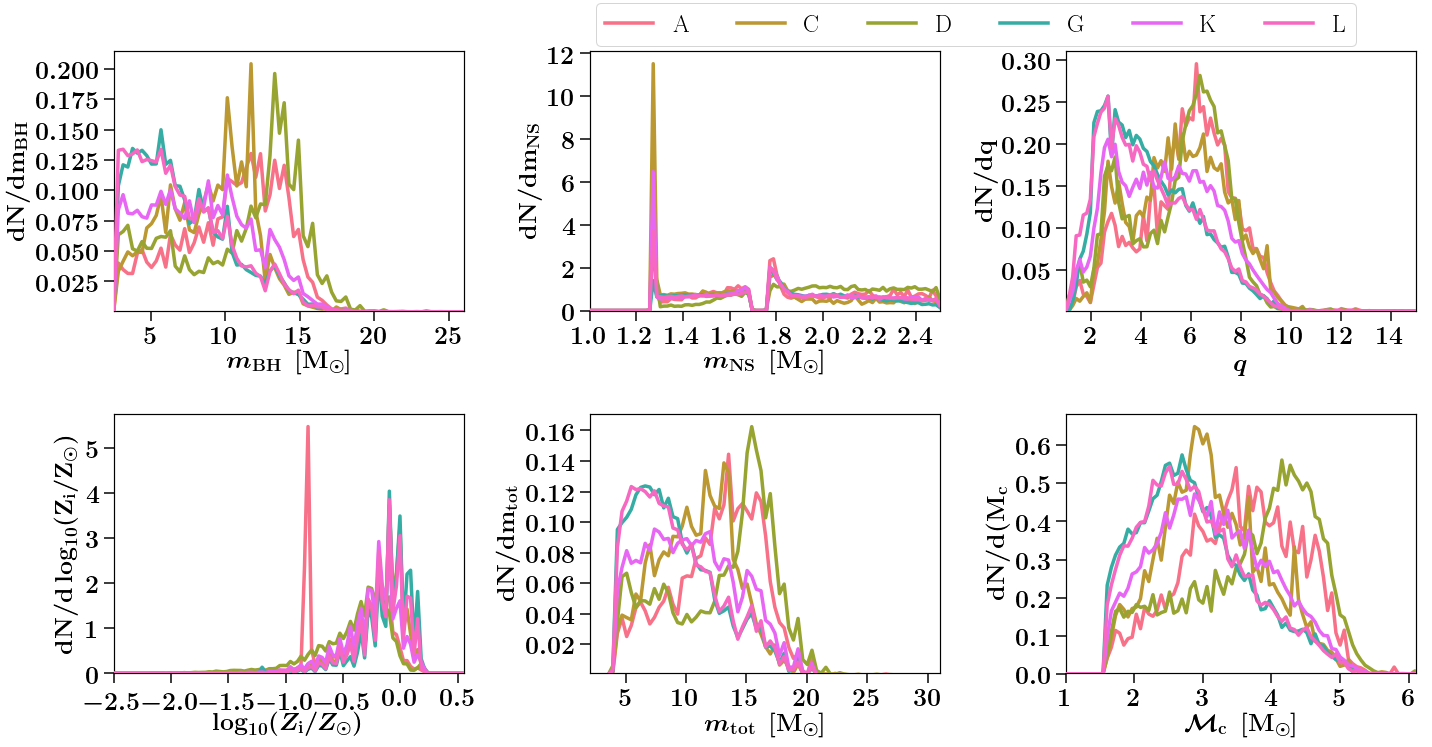

In [68]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000']#, '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=3,nrows=2,figsize=(20,10))





# Mass BH 
nameY = r'$\rm{d}N / \rm{d} m_{\rm{BH}}  $'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xparamGroup='doubleCompactObjects'
xparam='MBH'
handles, labels = None, None
BPSlist = ['A', 'C', 'F']#, 'D', 'G', 'K', 'L' ]
whichBPScolor = ['A']#, 'C', 'D', 'G', 'K', 'L' ]
whichWeight='det'
whichPlot = 'kde'

handles, labels=makeDistributionPlotManyModels(axe=ax[0,0], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,34], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,26], ylim=[0.001,1.05], indplot=0, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 

nameY = r'${\rm{d}}N / {\rm{d}} m_{\rm{NS}}  $'
nameX = r' $m_{\rm{NS}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeDistributionPlotManyModels(axe=ax[0,1], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,2.5], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,2.5], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'$\rm{d}N / \rm{d} q  $'
nameX = r' $q$ $ \, $'
xparam='q'
_,_=makeDistributionPlotManyModels(axe=ax[0,2], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,15], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 



nameY = r'$\rm{d}N / \rm{d}\log_{10}(Z_{\rm{i}}/Z_{\odot})  $'
nameX = r' $\log_{10}(Z_{\rm{i}}/Z_{\odot})$ $ \, $'
xparam='logZ'
_,_=makeDistributionPlotManyModels(axe=ax[1,0], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[-2.5,0.55], xlabel=nameX, ylabel=nameY, \
                              xlim=[-2.5,0.55], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'$\rm{d}N / \rm{d} m_{\rm{tot}}  $'
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeDistributionPlotManyModels(axe=ax[1,1], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2,40], xlabel=nameX, ylabel=nameY, \
                              xlim=[2,31], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'$\rm{d}N / \rm{d}({M}_{\rm{c}}  $'
nameX = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeDistributionPlotManyModels(axe=ax[1,2], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,6.1], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 



# # Mass ratio
# nameX = r' $q$ $ \, $'
# _,_=plotdesigndistributionModels(axe=ax[0,2], dfkey='q', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,15], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 


# inspiral time
# nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
# _,_=plotdesigndistributionModels(axe=ax[1,1], dfkey='mtot', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[2,45], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# # inspiral time

# _,_=plotdesigndistributionModels(axe=ax[1,2], dfkey='mchirp', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,7], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 






# def makeDistributionPlotManyModels(axe=None, xparamGroup='doubleCompactObjects', xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']):
    
    


# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.36, hspace=0.4)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ xparam +'_PDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353

now at model  A
bandwith for model  A  is bw=  0.01
now at model  B
bandwith for model  B  is bw=  0.01
now at model  C
bandwith for model  C  is bw=  0.01
now at model  D
bandwith for model  D  is bw=  0.02
now at model  F
bandwith for model  F  is bw=  0.007
now at model  G
bandwith for model  G  is bw=  0.005
now at model  K
bandwith for model  K  is bw=  0.008
now at model  L
bandwith for model  L  is bw=  0.006
now at model  A
bandwith for model  A  is bw=  0.01
now at model  B
bandwith for model  B  is bw=  0.01
now at model  C
bandwith for model  C  is bw=  0.01
now at model  D
bandwith for model  D  is bw=  0.02
now at model  F
bandwith for model  F  is bw=  0.007
now at model  G
bandwith for model  G  is bw=  0.005
now at model  K
bandwith for model  K  is bw=  0.008
now at model  L
bandwith for model  L  is bw=  0.006
now at model  A
bandwith for model  A  is bw=  0.01
now at model  B
bandwith for model  B  is bw=  0.01
now at model  C
bandwith for model  C  is bw=  0.01
now 

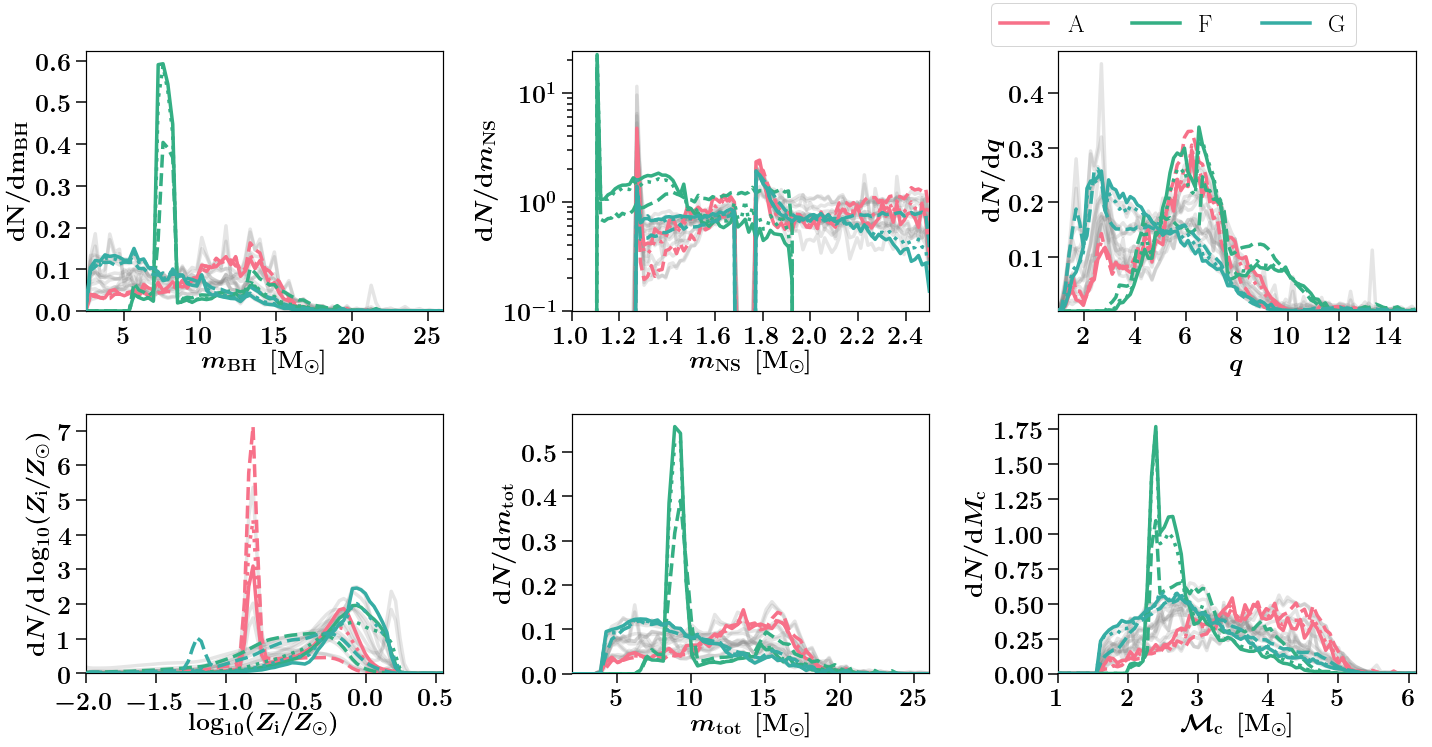

In [87]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000', '231', '312']
#['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=3,nrows=2,figsize=(20,10))





# Mass BH 
nameY = r'$\rm{d}N / \rm{d} m_{\rm{BH}}  $'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xparamGroup='doubleCompactObjects'
xparam='MBH'
handles, labels = None, None
BPSlist = ['A','B',  'C', 'D','F', 'G', 'K', 'L' ]
whichBPScolor = ['A', 'F', 'G']#, 'C', 'D', 'G', 'K', 'L' ]
whichWeight='det'
whichPlot = 'kde'

handles, labels=makeDistributionPlotManyModels(axe=ax[0,0], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,34], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,26], ylim=[0.001,1.05], indplot=0, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 

nameY = r'${\rm{d}}N / {\rm{d}} m_{\rm{NS}}  $'
nameX = r' $m_{\rm{NS}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeDistributionPlotManyModels(axe=ax[0,1], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,2.5], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,2.5], ylim=[0.1,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'${\rm{d}}N / {\rm{d}} q  $'
nameX = r' $q$ $ \, $'
xparam='q'
_,_=makeDistributionPlotManyModels(axe=ax[0,2], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,15], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 



nameY = r'${\rm{d}}N / {\rm{d}} \log_{10}(Z_{\rm{i}}/Z_{\odot})  $'
nameX = r' $\log_{10}(Z_{\rm{i}}/Z_{\odot})$ $ \, $'
xparam='logZ'
_,_=makeDistributionPlotManyModels(axe=ax[1,0], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[-2.5,0.55], xlabel=nameX, ylabel=nameY, \
                              xlim=[-2,0.55], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'${\rm{d}}N / {\rm{d}}  m_{\rm{tot}}  $'
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeDistributionPlotManyModels(axe=ax[1,1], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2,40], xlabel=nameX, ylabel=nameY, \
                              xlim=[2,26], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'${\rm{d}}N / {\rm{d}} {M}_{\rm{c}}  $'
nameX = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeDistributionPlotManyModels(axe=ax[1,2], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,6.1], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 



# # Mass ratio
# nameX = r' $q$ $ \, $'
# _,_=plotdesigndistributionModels(axe=ax[0,2], dfkey='q', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,15], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 


# inspiral time
# nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
# _,_=plotdesigndistributionModels(axe=ax[1,1], dfkey='mtot', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[2,45], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# # inspiral time

# _,_=plotdesigndistributionModels(axe=ax[1,2], dfkey='mchirp', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,7], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 






# def makeDistributionPlotManyModels(axe=None, xparamGroup='doubleCompactObjects', xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']):
    
    


# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.36, hspace=0.4)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight   +'_KDE.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353

now at model  A
now at model  C
now at model  D
now at model  G
now at model  K
now at model  L
now at model  A
now at model  C
now at model  D
now at model  G
now at model  K
now at model  L
now at model  A
now at model  C
now at model  D
now at model  G
now at model  K
now at model  L
now at model  A
logZ !!
now at model  C
logZ !!
now at model  D
logZ !!
now at model  G
logZ !!
now at model  K
logZ !!
now at model  L
logZ !!
now at model  A
now at model  C
now at model  D
now at model  G
now at model  K
now at model  L
now at model  A
now at model  C
now at model  D
now at model  G
now at model  K
now at model  L


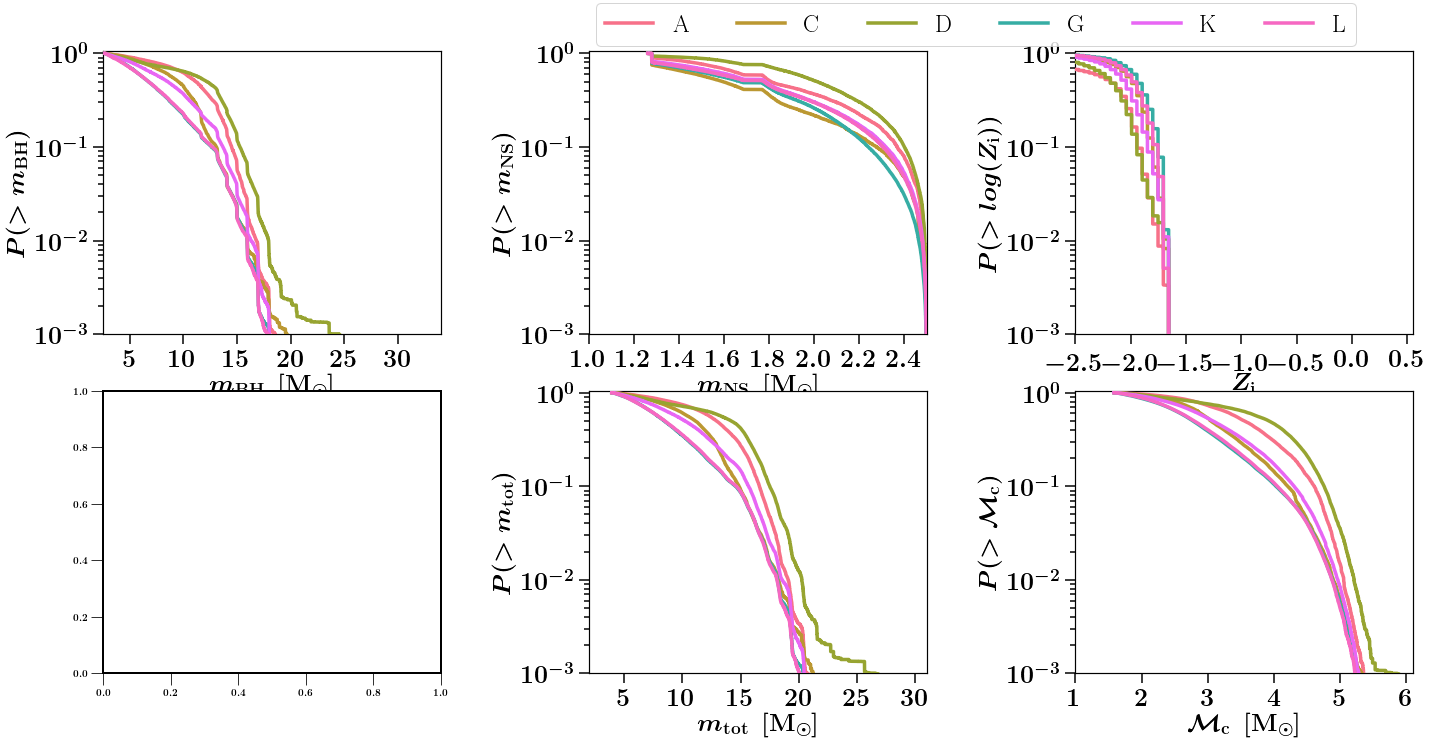

In [51]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000']#, '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=3,nrows=2,figsize=(20,10))





# Mass BH 
nameY = r'$P(>m_{\rm{BH}})  $'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xparamGroup='doubleCompactObjects'
xparam='MBH'
handles, labels = None, None
BPSlist = ['A', 'C', 'D', 'G', 'K', 'L' ]
whichBPScolor = ['A', 'C', 'D', 'G', 'K', 'L' ]
whichWeight='det'
whichPlot = 'minuscdf'

handles, labels=makeDistributionPlotManyModels(axe=ax[0,0], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,34], ylim=[0.001,1.05], indplot=0, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 

nameY = r'$P(>m_{\rm{NS}})  $'
nameX = r' $m_{\rm{NS}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeDistributionPlotManyModels(axe=ax[0,1], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,2.5], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'$P(>q)  $'
nameX = r' $q$ $ \, $'
xparam='q'
_,_=makeDistributionPlotManyModels(axe=ax[0,2], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,15], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 



nameY = r'$P(>log(Z_{\rm{i}}))  $'
nameX = r' $Z_{\rm{i}}$ $ \, $'
xparam='logZ'
_,_=makeDistributionPlotManyModels(axe=ax[1,0], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[-2.5,0.55], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'$P(>m_{\rm{tot}})  $'
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeDistributionPlotManyModels(axe=ax[1,1], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2,31], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 


nameY = r'$P(>\mathcal{M}_{\rm{c}})  $'
nameX = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeDistributionPlotManyModels(axe=ax[1,2], xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,6.1], ylim=[0.001,1.05], indplot=1, whichWeight=whichWeight, whichPlot=whichPlot, whichBPScolor=whichBPScolor) 



# # Mass ratio
# nameX = r' $q$ $ \, $'
# _,_=plotdesigndistributionModels(axe=ax[0,2], dfkey='q', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,15], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 


# inspiral time
# nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
# _,_=plotdesigndistributionModels(axe=ax[1,1], dfkey='mtot', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[2,45], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# # inspiral time

# _,_=plotdesigndistributionModels(axe=ax[1,2], dfkey='mchirp', BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,7], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 






# def makeDistributionPlotManyModels(axe=None, xparamGroup='doubleCompactObjects', xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']):
    
    


# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.44, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ xparam +'_CDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353

In [47]:
AAA=np.logspace(-4,0) #*Zsun 
print(1./AAA)

[1.00000000e+04 8.28642773e+03 6.86648845e+03 5.68986603e+03
 4.71486636e+03 3.90693994e+03 3.23745754e+03 2.68269580e+03
 2.22299648e+03 1.84206997e+03 1.52641797e+03 1.26485522e+03
 1.04811313e+03 8.68511374e+02 7.19685673e+02 5.96362332e+02
 4.94171336e+02 4.09491506e+02 3.39322177e+02 2.81176870e+02
 2.32995181e+02 1.93069773e+02 1.59985872e+02 1.32571137e+02
 1.09854114e+02 9.10298178e+01 7.54312006e+01 6.25055193e+01
 5.17947468e+01 4.29193426e+01 3.55648031e+01 2.94705170e+01
 2.44205309e+01 2.02358965e+01 1.67683294e+01 1.38949549e+01
 1.15139540e+01 9.54095476e+00 7.90604321e+00 6.55128557e+00
 5.42867544e+00 4.49843267e+00 3.72759372e+00 3.08884360e+00
 2.55954792e+00 2.12095089e+00 1.75751062e+00 1.45634848e+00
 1.20679264e+00 1.00000000e+00]


now at model  A
now at model  C
now at model  D
now at model  G
now at model  K
now at model  L


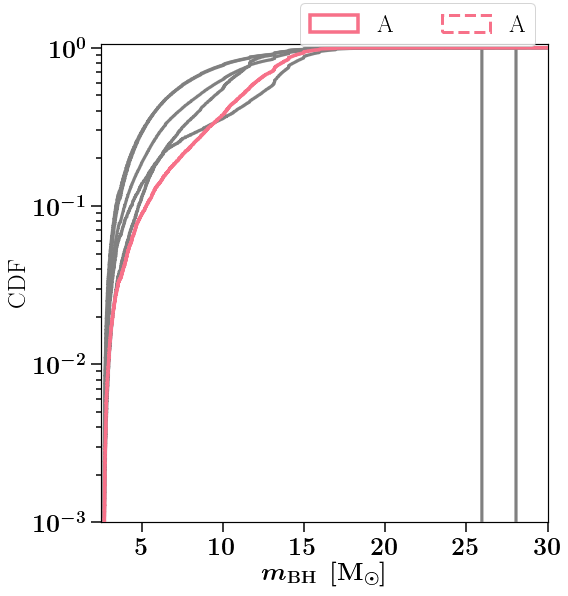

In [36]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000']#, '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))

NAME = 'massBH'



# Mass BH 
nameY = r'CDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xparamGroup='doubleCompactObjects'
xparam='MBH'
handles, labels = None, None
BPSlist = ['A', 'C', 'D', 'G', 'K', 'L' ]
whichBPScolor = ['A']
whichWeight='det'
handles, labels=makeDistributionPlotManyModels(axe=ax, xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,30], ylim=[0.001,1.05], indplot=0, whichWeight=whichWeight, whichPlot='cdf', whichBPScolor=whichBPScolor) 


# def makeDistributionPlotManyModels(axe=None, xparamGroup='doubleCompactObjects', xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']):
    
    


# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_CDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353

In [ ]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000']#, '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))

NAME = 'massBH'



# Mass BH 
nameY = r'CDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xparamGroup='doubleCompactObjects'
xparam='MBH'
handles, labels = None, None
BPSlist = ['A', 'C', 'D', 'G', 'K', 'L' ]
whichBPScolor = ['A']
whichWeight='det'
handles, labels=makeDistributionPlotManyModels(axe=ax, xparamGroup=xparamGroup,xparam=xparam,  BPSmodelNames=BPSlist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,30], ylim=[0.001,1.05], indplot=0, whichWeight=whichWeight, whichPlot='cdf', whichBPScolor=whichBPScolor) 


# def makeDistributionPlotManyModels(axe=None, xparamGroup='doubleCompactObjects', xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']):
    
    


# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_CDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353

In [ ]:
def plotdesigndistributionModels(axe=None, dfkey='mass1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
                              xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']): 
    """ 
    plot total mass distribution with channels 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    indplot = something I use to hack the legend labels (I only want to plot the legends for some subplots)
    whichWeight = 'intrinsic' 'observed'
    you can just put indplot=0 or indplot=1 to get labels or no labels resp. 
    """
    
#     BPScolors = sns.color_palette("husl", len(xvarDCO)) 
    BPScolors = ['crimson', 'purple', 'mediumblue', 'cyan', 'teal', 'lime', 'gold', 'darkorange', 'orangered', 'red']
    lw = 3.5
    
    
    for ind_m, BPSmodelName in enumerate(BPSmodelNames):
            print('now at m=', BPSmodelName)
            # read in model
            df = pd.read_csv('CompactData_model_' + BPSmodelName + '_' + DCOtype + '.csv', header=[0], skiprows=[1])
            
            if dfkey in ['q', 'mchirp', 'mtot', 'massBH', 'massNS']:
                xvar1 = df['mass1']
                xvar2 = df['mass2']
                M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2)
                if dfkey =='mtot':
                    xvar=M1+M2
                elif dfkey=='massBH':
                    xvar = M1
                elif dfkey=='massNS':
                    xvar = M2                
                elif dfkey =='q':
                    xvar = M1/M2
                elif dfkey=='mchirp':
                    xvar = chirpmass(M1,M2)
                else:
                    print('KeyError')
                del M1
                del M2
                del xvar1
                del xvar2
                
            else:
                xvar = df[dfkey]
            
            if dfkey=='tc':
                xvar = xvar/1000 # convert to Gyr 
            
            label = None
            
            if BPSmodelName in whichBPScolor:
                BPScolor = BPScolors[ind_m]
            else:
                BPScolor = 'gray'
            
            
            ii=0
            for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
                # read in MSSFR weights: 
                if whichWeight=='det':
                    dfkey_w = mssfr+'_R_det'
                elif whichWeight=='z0':
                    dfkey_w = mssfr+'_R_z0'
                w = df[dfkey_w]
                

                

                # make the plot 
                if whichPlot=='cdf':
                    # if one of 4 selected MSSFR: 
                    if ind_mssfr in [0,1,2,7]:
                        if ind_mssfr==0:
                            if BPSmodelName in whichBPScolor:
                                label=BPSmodelName
                        axe.hist(xvar, density=True, bins=len(xvar), cumulative=True,
                                 histtype='step', alpha=1, color=BPScolor, label=label,\
                                 linewidth=3, linestyle=MSSFRlinestyles[ii], zorder=10, weights=w)
                        ii+=1
                        
                    else:
                        axe.hist(xvar, density=True, bins=len(xvar), cumulative=True,
                                 histtype='step', alpha=0.2, color=BPScolor, label=label,\
                                 linewidth=3, linestyle='-', zorder=2, weights=w)                        
        
    # MAKE CDF background
#     y_quantiles = np.linspace(0.1,1,10)
#     x_quantiles = np.linspace(xlim[0], xlim[1], 10)
#     yy_0 = np.zeros_like(x_quantiles)

#     # COLOR MAP 
#     cm       = plt.get_cmap('Greys')
#     Nc = 10
#     greys = [cm(x) for x in np.linspace(0,1 , int(1.5*Nc))]  # I dont want the dark colors
    
#     ii = 0
#     for ind in range(Nc):
#         ii +=0.10
#         yy_q = np.ones_like(yy_0) * ii 
#         axe.fill_between(x_quantiles, yy_0, yy_q, facecolor=greys[ind], \
#                          alpha=1, zorder=1)#,\  
#         textt_q = r'$\,$' + str(np.round(ii*100., 1))  +'\%'
# #         axe.text(xlim[1], ii, s=textt_q, rotation = 0, \
# #                  fontsize = fs-10, color ='k', ha = 'left', va='center')#, weight = 'bold')
#         yy_0 = yy_q 

  
    del xvar
    del w
    ###########
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])
        

    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    

    
    if indplot==0: 
        handles, labels = axe.get_legend_handles_labels()
    else:
        handles, labels = None, None
        
#     axe.grid(True)
    
    
    return handles, labels
    

In [2]:
MSSFRnameslist

NameError: name 'MSSFRnameslist' is not defined

In [1]:
print([MSSFRnameslist[0:2]])
print(MSSFRnameslist[0:2])
print(BPSnameslist[0])


MSSFRnameslist

NameError: name 'MSSFRnameslist' is not defined

now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J
now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J
now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J
now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J
now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J
now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J


NameError: name 'whichWeight' is not defined

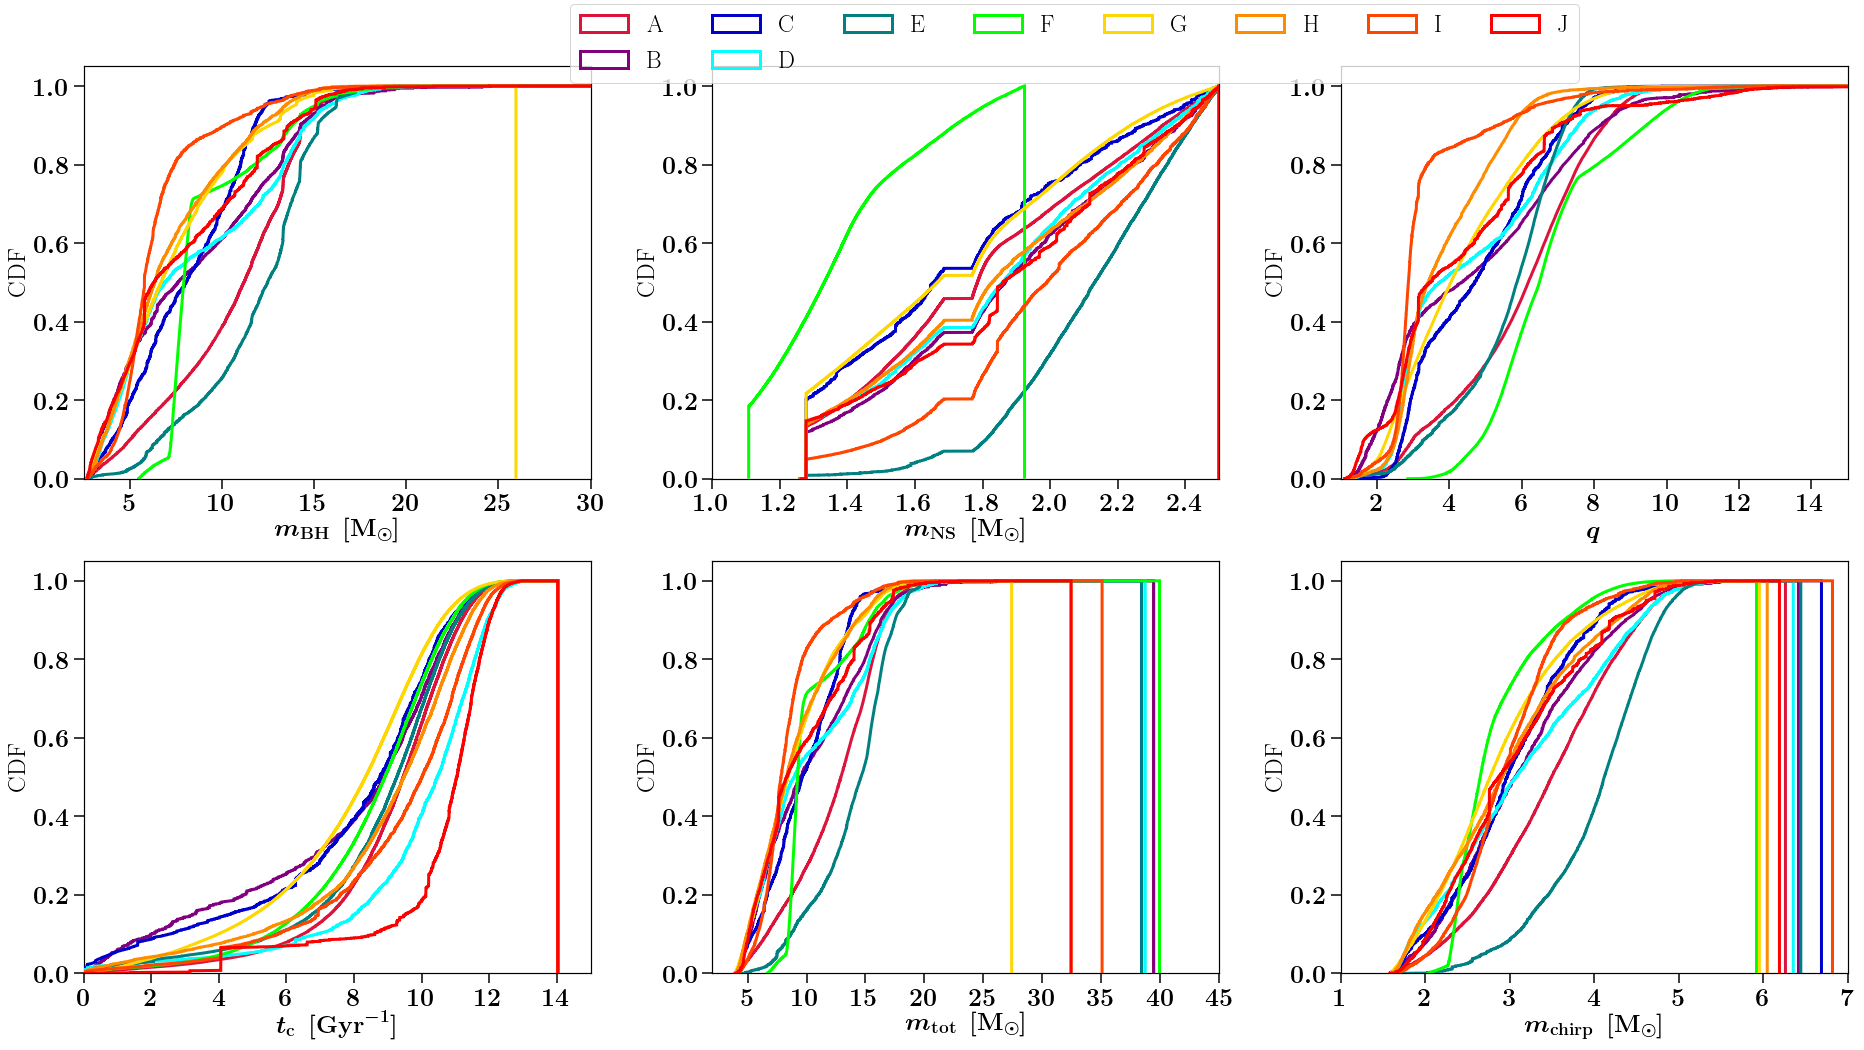

In [8]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = [MSSFRnameslist[0]]

TYPE = 'BHNS'
whichWeight='det'

f, ax= plt.subplots(ncols=3,nrows=2,figsize=(26,14), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5], "height_ratios":[2,2]})



# Mass BH 
nameY = r'CDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
handles, labels=plotdesigndistributionModels(axe=ax[0,0], dfkey='massBH', BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 


# Mass NS 
nameX = r' $m_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
_,_=plotdesigndistributionModels(axe=ax[0,1], dfkey='massNS', BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,2.5], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# Mass ratio
nameX = r' $q$ $ \, $'
_,_=plotdesigndistributionModels(axe=ax[0,2], dfkey='q', BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,15], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# inspiral time
nameX = r' $t_{\rm{c}}$ $ \,  [\rm{Gyr}^{-1}]$'
_,_=plotdesigndistributionModels(axe=ax[1,0], dfkey='tc', BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[0,15], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# inspiral time
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
_,_=plotdesigndistributionModels(axe=ax[1,1], dfkey='mtot', BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2,45], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 

# inspiral time
nameX = r' $m_{\rm{chirp}}$ $ \,  [\rm{M}_{\odot}]$'
_,_=plotdesigndistributionModels(axe=ax[1,2], dfkey='mchirp', BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,7], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=BPSnameslist) 


#general
# everything is BHBH, BHNS, NSNS order
# bandwidthDCO = 0.1 # , .02, 0.1]

# DataDCO = [Data_model_BBH_A, Data_modelA,  Data_model_BNS_A]
# weightsObserved = [rates_model_BBH_A, rates_modelA, rates_model_BNS_A]

# weightsBPS = [rates_modelA, rates_modelB, rates_modelC, rates_modelD, rates_modelE,  rates_model_BHNS_F, rates_model_BHNS_G, rates_model_BHNS_H]
# # weightDCO = weightsObserved
# weightDCO = weightsBPS
# # for Data in BPSDatas:
# #     w = Data.COMPAS.weight
# #     weightDCO.append(w)

# ####### BH MASS 
# xvarDCO=[]
# bandwidthDCO = []
# ii=0
# for Data in BPSDatas:
#     M1, M2 = Data.COMPAS.mass1, Data.COMPAS.mass2
#     MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
#     xvar = MBH
#     xvarDCO.append(xvar)

#     bw = 0.01 *  1/(( len(xvar) /  1366530.))**0.6
#     bw= np.round(bw,2)
#     bandwidthDCO.append(bw)
#     ii+=1
# print('bandwidths = ', bandwidthDCO)




# handles, labels=plotdesigndistributionModels(axe=ax[0,0], pdkey='mass1', modelNames='A', xvarrange=None, xlabel=nameX, ylabel=nameY, \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf') 



handles, labels = np.asarray(handles), np.asarray(labels)
# Nmssfr
# maskFirst = [::Nmssfr]
# LEGEND
lgd = f.legend(handles, labels, fontsize=fs, ncol=10,\
         bbox_to_anchor=(.85, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE +'_CDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()







In [8]:
DCOtype ='BHNS'
whichWeight = 'det'
xvarMBH, xvarMNS, xvarTc, xvarlogTc = [], [], [], []
xvarMtot, xvarMchirp, xvarq = [], [], []
BPS_weights = []
for ind_m, BPSmodelName in enumerate(BPSnameslist):
    
    print('now at m=', BPSmodelName)
    # read in model
    df = pd.read_csv('CompactData_model_' + BPSmodelName + '_' + DCOtype + '.csv', header=[0], skiprows=[1])


    xvar1 = np.asarray(df['mass1'])
    xvar2 = np.asarray(df['mass2'])
    M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2)
    tc = df['tc']/1000. # Gyr


    xvarMBH.append(M1)
    xvarMNS.append(M2)
    xvarTc.append(tc)
    xvarlogTc.append(np.log10(tc))
    xvarMtot.append(M1+M2)
    xvarMchirp.append(chirpmass(M1, M2))
    xvarq.append(M1/M2)
    
    MSSFRmodelNames = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']        
    temp = np.zeros((len(MSSFRmodelNames),len(M1)))
    for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
        # read in MSSFR weights: 
        if whichWeight =='det':
            dfkey_w = mssfr+'_R_det'
        elif whichWeight=='z0':
            dfkey_w_z0 = mssfr+'_R_z0'
        w = np.asarray(df[dfkey_w])
        temp[ind_mssfr] = w
    BPS_weights.append(temp)
    del df 
        
                



now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J


In [13]:
print(len(BPS_weights[0]))


28


In [22]:
xx_boot_MBH = np.linspace(2.5, 30, 500)
xx_boot_MNS = np.linspace(1,   2.5,500)
xx_boot_Tc =  np.linspace(0, 14,500)
xx_boot_logTc = np.linspace(-4, 5,500)
xx_boot_Mtot = np.linspace(2, 45, 500)
xx_boot_Mchirp = np.linspace(1, 8,500)
xx_boot_q = np.linspace(1,   15, 500)

xx_boots = [xx_boot_MBH, xx_boot_MNS, xx_boot_Tc, xx_boot_logTc, xx_boot_Mtot, xx_boot_Mchirp, xx_boot_q]
xvars = [xvarMBH, xvarMNS, xvarTc, xvarlogTc, xvarMtot, xvarMchirp, xvarq]
boots_mins_models, boots_maxs_models = [], []
xvarMSSFRboots_models = []
for ind_m, BPSmodelName in enumerate(BPSnameslist):
    print('now at m=', BPSmodelName)
    boot_mins, boot_maxs = [], []
    xvarMSSFRboots = []
    for ind_b, xx_boot in enumerate(xx_boots):
        xvar = xvars[ind_b][ind_m]
        # set bandwidrh: scott's rule * 0.1
        bw = 0.01 *  1/(( len(xvar) /  1366530.))**0.6
        bw= round_to_1(bw) # round to 1 significant digit
        print('bandwith for model ', BPSmodelName, ' is bw= ', bw)
        
        yy_ = np.zeros((28,500))
        MSSFRyy_boot = []
        for ind_mssfr, Rate in enumerate(BPS_weights):
            w = Rate[ind_m][ind_mssfr]

            KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
            yy_boot = KDE(xx_boot)
            
            yy_[ind_mssfr] = np.min(yy_boot) 
            
            if ind_mssfr in [0,1,2,7]:
                print(MSSFRnameslist[ind_mssfr])
                print('saving this MSSFR')
                MSSFRyy_boot.append(yy_boot)
            
        yy_min = np.min(yy_,axis=0)
        yy_max = np.max(yy_,axis=0)
        
        boot_mins.append(yy_min)
        boot_maxs.append(yy_max)
        
        xvarMSSFRboots.append(MSSFRyy_boot)
        
    boots_mins_models.append(boot_mins) 
    boots_maxs_models.append(boot_maxs) 
    xvarMSSFRboots_models.append(xvarMSSFRboots)

now at m= A
bandwith for model  A  is bw=  0.01


/Users/floorbroekgaarden/anaconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  A  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  A  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  A  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  A  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  A  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  A  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
now at m= B
bandwith for model  B  is bw=  0.01


/Users/floorbroekgaarden/Projects/BHNS_project/Scripts/PostProcessingScripts.py:955: RuntimeWarning: divide by zero encountered in true_divide
  self._data_covariance /= (1 - np.sum(self.weights ** 2))


000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  B  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  B  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  B  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  B  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  B  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  B  is bw=  0.01
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
now at m= C
bandwith for model  C  is bw=  0.07
000
saving this MSSFR
111
saving this MSSFR
211
saving this MSSFR
113
saving this MSSFR
bandwith for model  C  is bw=  0

In [81]:
def plotdesigndistributionModels(axe=None, xvarList=[1], weightsList=[1], BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
                              xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A']): 
    """ 
    plot total mass distribution with channels 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    indplot = something I use to hack the legend labels (I only want to plot the legends for some subplots)
    whichWeight = 'intrinsic' 'observed'
    you can just put indplot=0 or indplot=1 to get labels or no labels resp. 
    """
    
#     BPScolors = sns.color_palette("husl", len(xvarDCO)) 
    BPScolors = ['crimson', 'purple', 'mediumblue', 'cyan', 'teal', 'lime', 'gold', 'darkorange', 'orangered', 'red']
    lw = 3.5
    
    ymax=0.
    for ind_m, BPSmodelName in enumerate(BPSmodelNames):
            print('now at m=', BPSmodelName)
            # read in model

                

            xvar = xvarList[ind_m]
            
            if BPSmodelName in whichBPScolor:
                BPScolor = BPScolors[ind_m]
            else:
                BPScolor = 'gray'
            
            
            ii=0
            
            for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
                # read in MSSFR weights: 
                w=weightsList[ind_m][ind_mssfr]
                
   
                if BPSmodelName in whichBPScolor:
                    if ind_mssfr in [0,1,2,7]:
                        zorder=20
                        ALPHA=1
                        label = None
                        linestyle = MSSFRlinestyles[ii]
                        ii+=1
                        BPScolor = BPScolors[ind_m]
                        # only give label for fiducial MSSFR
                        if ind_mssfr==0:
                            label = BPSnameslist[ind_m]
                    else:
                        zorder=10
                        ALPHA=0.1
                        label = None
                        linestyle = '-'
                        BPScolor = BPScolors[ind_m]

                        
                else:
                    zorder=1
                    ALPHA=0.2
                    label=None
                    linestyle='-'
                    BPScolor='gray'
                        
                # make the plot 
                if whichPlot=='cdf':
                    axe.hist(xvar, density=True, bins=len(xvar), cumulative=True,
                             histtype='step', alpha=ALPHA, color=BPScolor, label=label,\
                             linewidth=lw, linestyle=linestyle, zorder=zorder, weights=w)
                if whichPlot=='pdf':
                    axe.hist(xvar, density=True, bins=np.linspace(xlim[0],xlim[1],50), cumulative=False,
                             histtype='step', alpha=ALPHA, color=BPScolor, label=label,\
                             linewidth=lw, linestyle=linestyle, zorder=zorder, weights=w)

                if whichPlot=='kde':
                    
                    xx_boot = np.linspace(xvarrange[0],xvarrange[1],500)
                    # set bandwidrh: scott's rule * 0.1
                    bw = 0.01 *  1/(( len(xvar) /  1366530.))**0.6
                    bw= round_to_1(bw) # round to 1 significant digit
                    if ind_mssfr==0:
                        print('bandwith for model ', BPSmodelName, ' is bw= ', bw)
                        
                    KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
                    yy_boot = KDE(xx_boot)
                    
                    
                    axe.plot(xx_boot, yy_boot, alpha=ALPHA, color=BPScolor, label=label,\
                             linewidth=lw, linestyle=linestyle, zorder=zorder  ) 
                    
                    ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
                    ylim[1]=ymax*1.05
                    
                    
    del xvar
    del w
    ###########
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])
        

    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    

    
    if indplot==0: 
        handles, labels = axe.get_legend_handles_labels()
    else:
        handles, labels = None, None
        
#     axe.grid(True)
    
    
    return handles, labels
    

now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J


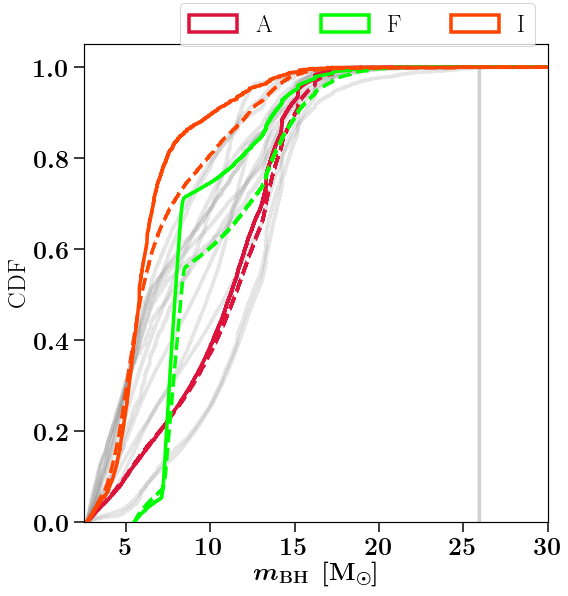

In [50]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000', '111']#, '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))

NAME = 'massBH'



# Mass BH 
nameY = r'CDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xvar = xvarMBH
handles, labels = None, None
whichBPScolor = ['A', 'F', 'I']
handles, labels=plotdesigndistributionModels(axe=ax, xvarList=xvar, weightsList=BPS_weights, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=whichBPScolor) 



# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_CDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()







now at m= A
now at m= B
now at m= C
now at m= D
now at m= E
now at m= F
now at m= G
now at m= H
now at m= I
now at m= J


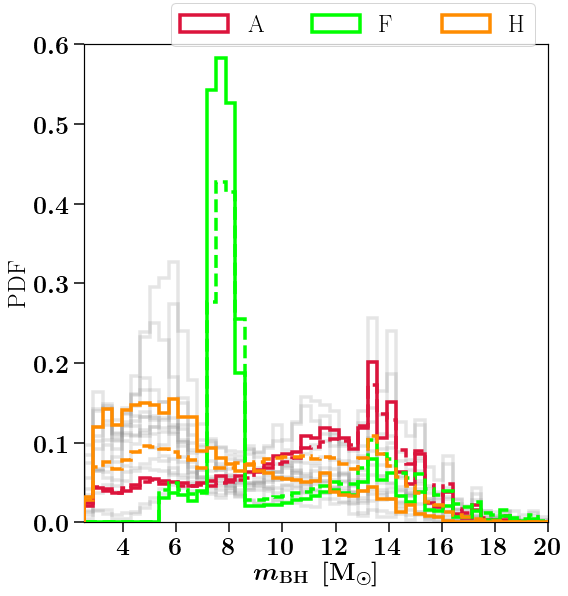

In [53]:

MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
MSSFRnameslist = ['000', '111']#, '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'
f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))


# Mass BH 
NAME = 'massBH'
nameY = r'PDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xvar = xvarMBH
handles, labels = None, None
whichBPScolor = ['A', 'F', 'H']
handles, labels=plotdesigndistributionModels(axe=ax, xvarList=xvar, weightsList=BPS_weights, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=None, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,20], ylim=[0,.6], indplot=0, whichWeight='det', whichPlot='pdf', whichBPScolor=whichBPScolor) 


# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.95, 1.05),  markerscale=3., scatterpoints=1) # loc = 'upper center')

plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_PDF.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()


In [ ]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312']#, '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))

NAME = 'massBH'



# Mass BH 
nameY = r'PDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xvar = xvarMBH
handles, labels = None, None
whichBPScolor = ['A',  'F', 'I']
handles, labels=plotdesigndistributionModels(axe=ax, xvarList=xvar, weightsList=BPS_weights, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,40], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,20], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='kde', whichBPScolor=whichBPScolor) 



# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=8,\
         bbox_to_anchor=(.92, 1.08),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_KDE.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()







now at m= A
bandwith for model  A  is bw=  0.01
now at m= B
bandwith for model  B  is bw=  0.01
now at m= C
bandwith for model  C  is bw=  0.07
now at m= D
bandwith for model  D  is bw=  0.03
now at m= E
bandwith for model  E  is bw=  0.02
now at m= F
bandwith for model  F  is bw=  0.006
now at m= G
bandwith for model  G  is bw=  0.005


now at m= A
bandwith for model  A  is bw=  0.01
now at m= B
bandwith for model  B  is bw=  0.01
now at m= C
bandwith for model  C  is bw=  0.07
now at m= D
bandwith for model  D  is bw=  0.03
now at m= E
bandwith for model  E  is bw=  0.02
now at m= F
bandwith for model  F  is bw=  0.006
now at m= G
bandwith for model  G  is bw=  0.005
now at m= H
bandwith for model  H  is bw=  0.01
now at m= I
bandwith for model  I  is bw=  0.03
now at m= J
bandwith for model  J  is bw=  0.03


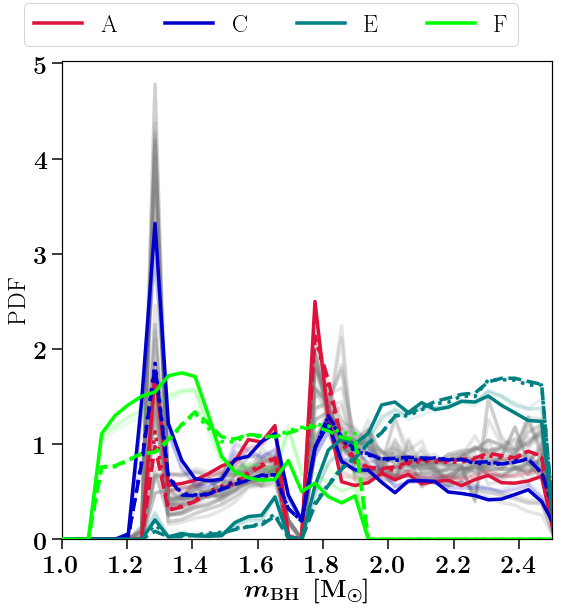

In [77]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312']#, '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))

NAME = 'massNS'



# Mass BH 
nameY = r'PDF'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xvar = xvarMNS
handles, labels = None, None
whichBPScolor = ['A', 'C',  'E', 'F']
handles, labels=plotdesigndistributionModels(axe=ax, xvarList=xvar, weightsList=BPS_weights, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,2.5], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='kde', whichBPScolor=whichBPScolor) 



# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=4,\
         bbox_to_anchor=(.92, 1.08),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_KDE.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()







In [63]:
from math import log10, floor
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

In [66]:
print(round_to_1(bw))

0.001


now at m= A
bandwith for model  A  is bw=  0.01
now at m= B
bandwith for model  B  is bw=  0.01
now at m= C
bandwith for model  C  is bw=  0.07
now at m= D
bandwith for model  D  is bw=  0.03
now at m= E
bandwith for model  E  is bw=  0.02
now at m= F
bandwith for model  F  is bw=  0.006
now at m= G
bandwith for model  G  is bw=  0.005
now at m= H
bandwith for model  H  is bw=  0.01
now at m= I
bandwith for model  I  is bw=  0.03
now at m= J
bandwith for model  J  is bw=  0.03


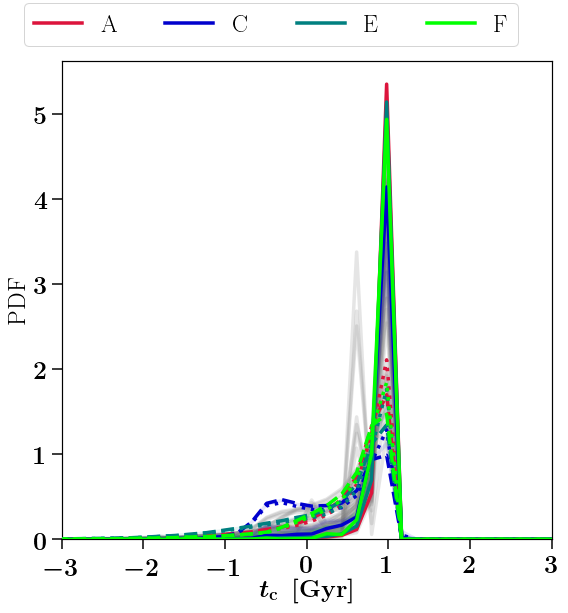

In [80]:

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312']#, '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']

TYPE = 'BHNS'


f, ax= plt.subplots(ncols=1,nrows=1,figsize=(8,8))

NAME = 'tc'



# Mass BH 
nameY = r'PDF'
nameX = r' $t_{\rm{c}}$ $ \,  [\rm{Gyr}]$'
xvar =[]
for ind_m, m in enumerate(BPSnameslist):
    tc = xvarTc[ind_m]
    tc = np.log10(tc/1000)
    xvar.append(tc)


handles, labels = None, None
whichBPScolor = ['A', 'C',  'E', 'F']
handles, labels=plotdesigndistributionModels(axe=ax, xvarList=xvar, weightsList=BPS_weights, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[-6,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[-3,3], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='kde', whichBPScolor=whichBPScolor) 



# LEGEND
handles, labels = np.asarray(handles), np.asarray(labels)
# maskBPS = [0, 5]

lgd = f.legend(handles, labels, fontsize=fs, ncol=4,\
         bbox_to_anchor=(.92, 1.08),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.24, hspace=0.2)
# plt.savefig('./DistributionsModels_' + whichWeight + '_' + TYPE +'_CDF.pdf', transparent=False,\
#            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('./DistributionsModels_' + whichWeight + '_' +TYPE + '_'+ NAME +'_KDE.png', transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()





